In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
import time
import importlib

In [2]:
import sys
sys.path.append("../../../libs_bell")
from lib_preprocessing import job_ids_to_result, flatten_results_jobs_list, arrange_results_list_tensored3, results_list_to_hist_list

In [3]:
with open("pkls/raw_hist_list.pkl", "rb") as f:
    raw_hist_list = pickle.load(f)
with open("pkls/results_meas_cal.pkl", "rb") as f:
    results_meas_cal = pickle.load(f)

In [4]:
from libs_qrem import NationEtalFilter
from qiskit.ignis.mitigation.measurement import TensoredMeasFitter

In [5]:
max_size = 65
max_length = 64
nation_bicgstab_mitigator_list = []
for n in range(2, max_size + 1):
    mit_pattern = [[i] for i in range(n)]
    meas_fitter = TensoredMeasFitter(results_meas_cal[n - 1], mit_pattern=mit_pattern)
    nation_bicgstab_mitigator_list.append(NationEtalFilter(n, meas_fitter.cal_matrices))
    if n % 10 == 0:
        print("size", n, "finished")
print("length of nation_bicgstab_mitigator_list: ", len(nation_bicgstab_mitigator_list))

size 10 finished
size 20 finished
size 30 finished
size 40 finished
size 50 finished
size 60 finished
length of nation_bicgstab_mitigator_list:  64


In [6]:
for i in range(max_length):
    t1 = time.perf_counter()
    _ = nation_bicgstab_mitigator_list[i].apply(raw_hist_list[i + 1], method="bicgstab")
    t2 = time.perf_counter()
    print(i + 1, "th finished (", i + 2, "qubits,", t2 - t1, "s )")

1 th finished ( 2 qubits, 0.00011026499999999828 s )
2 th finished ( 3 qubits, 7.00909999977739e-05 s )
3 th finished ( 4 qubits, 0.00011798399999918274 s )
4 th finished ( 5 qubits, 0.00022338599999827125 s )
5 th finished ( 6 qubits, 0.0003467579999991699 s )
6 th finished ( 7 qubits, 0.0004601090000022623 s )
7 th finished ( 8 qubits, 0.0008984239999989541 s )
8 th finished ( 9 qubits, 0.0013518790000013325 s )
9 th finished ( 10 qubits, 0.002010057999999759 s )
10 th finished ( 11 qubits, 0.0031639420000004748 s )
11 th finished ( 12 qubits, 0.004759128999999973 s )
12 th finished ( 13 qubits, 0.007806352999999433 s )
13 th finished ( 14 qubits, 0.00960659500000105 s )
14 th finished ( 15 qubits, 0.014837438000000702 s )
15 th finished ( 16 qubits, 0.017233514000000838 s )
16 th finished ( 17 qubits, 0.03085317899999751 s )
17 th finished ( 18 qubits, 0.04425443099999882 s )
18 th finished ( 19 qubits, 0.05502222299999815 s )
19 th finished ( 20 qubits, 0.07207738500000005 s )
20 t

In [7]:
nation_bicgstab_mitigator_info = []
for i in range(max_length):
    t1 = time.perf_counter()
    nation_bicgstab_mitigator_info.append({"exact_one_norm_of_inv_reduced_A": nation_bicgstab_mitigator_list[i].exact_one_norm_of_inv_reduced_A(),
                                           "iterative_one_norm_of_inv_reduced_A": nation_bicgstab_mitigator_list[i].iterative_one_norm_of_inv_reduced_A(method="iterative"),
                                           "mitigated_hist": nation_bicgstab_mitigator_list[i].mitigated_hist(),
                                           "x_s": nation_bicgstab_mitigator_list[i].x_s(),
                                           "x_hat": nation_bicgstab_mitigator_list[i].x_hat(),
                                           "x_tilde": nation_bicgstab_mitigator_list[i].x_tilde(),
                                           "sum_of_x": nation_bicgstab_mitigator_list[i].sum_of_x(),
                                           "sum_of_x_hat": nation_bicgstab_mitigator_list[i].sum_of_x_hat(),
                                           "sum_of_x_tilde": nation_bicgstab_mitigator_list[i].sum_of_x_tilde(),
                                           "indices_to_keys_vector": nation_bicgstab_mitigator_list[i].indices_to_keys_vector(),
                                           "times": nation_bicgstab_mitigator_list[i].times(),
                                           "expval": nation_bicgstab_mitigator_list[i].expval(),
                                           "mitigation_stddev": nation_bicgstab_mitigator_list[i].mitigation_stddev(norm_type = "exact"),
                                 })
    t2 = time.perf_counter()
    print(i + 1, "th finished (", i + 2, "qubits,", t2 - t1, "s )")

1 th finished ( 2 qubits, 0.000518336999988378 s )
2 th finished ( 3 qubits, 0.00013942500001462577 s )
3 th finished ( 4 qubits, 0.00019624799998041453 s )
4 th finished ( 5 qubits, 0.00024461300000666597 s )
5 th finished ( 6 qubits, 0.0004937840000138749 s )
6 th finished ( 7 qubits, 0.0008645100000137518 s )
7 th finished ( 8 qubits, 0.002107129000023633 s )
8 th finished ( 9 qubits, 0.0038158829999872523 s )
9 th finished ( 10 qubits, 0.0076958029999900646 s )
10 th finished ( 11 qubits, 0.019729624000007107 s )
11 th finished ( 12 qubits, 0.020351990999984082 s )
12 th finished ( 13 qubits, 0.031057971999985057 s )
13 th finished ( 14 qubits, 0.05236958699998695 s )
14 th finished ( 15 qubits, 0.07722169900000608 s )
15 th finished ( 16 qubits, 0.11500561300002232 s )
16 th finished ( 17 qubits, 0.23378267399999686 s )
17 th finished ( 18 qubits, 0.31363547899999844 s )
18 th finished ( 19 qubits, 0.4298393130000022 s )
19 th finished ( 20 qubits, 0.5786155669999857 s )
20 th fin

In [8]:
with open("./pkls/nation_bicgstab_mitigator_info.pkl", "wb") as f:
    pickle.dump(nation_bicgstab_mitigator_info, f)

In [9]:
for i in range(max_length):
    print(i + 1, "th finished (", i + 2, "expval: ", nation_bicgstab_mitigator_list[i].expval(), " )")

1 th finished ( 2 expval:  0.9620350462980118  )
2 th finished ( 3 expval:  -0.011305336912500241  )
3 th finished ( 4 expval:  0.9914300253935047  )
4 th finished ( 5 expval:  0.035281613524738124  )
5 th finished ( 6 expval:  0.950483248673519  )
6 th finished ( 7 expval:  -0.031747031139105215  )
7 th finished ( 8 expval:  0.9044120873563479  )
8 th finished ( 9 expval:  0.032329743221295774  )
9 th finished ( 10 expval:  0.8976905672131609  )
10 th finished ( 11 expval:  0.0488716851698396  )
11 th finished ( 12 expval:  0.8141058047649238  )
12 th finished ( 13 expval:  0.09651456811701478  )
13 th finished ( 14 expval:  0.8312073104394081  )
14 th finished ( 15 expval:  0.04862301261667661  )
15 th finished ( 16 expval:  0.7423309019963942  )
16 th finished ( 17 expval:  0.09911045899527791  )
17 th finished ( 18 expval:  0.6860260019905794  )
18 th finished ( 19 expval:  0.08688731172624645  )
19 th finished ( 20 expval:  0.6271082006686896  )
20 th finished ( 21 expval:  0.1059

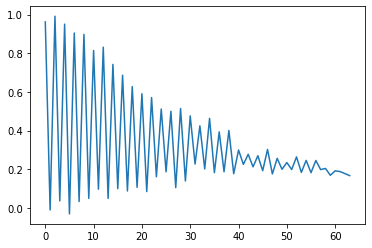

In [10]:
plt.plot([nation_bicgstab_mitigator_list[i].expval() for i in range(max_length)])

In [11]:
for i in range(max_length):
    t1 = time.perf_counter()
    nation_bicgstab_mitigator_info[i]["iterations"] = nation_bicgstab_mitigator_list[i].iterations()
    nation_bicgstab_mitigator_info[i]["error"] = nation_bicgstab_mitigator_list[i].error()
    t2 = time.perf_counter()
    print(i + 1, "th finished (", i + 2, "qubits,", t2 - t1, "s )")

1 th finished ( 2 qubits, 4.294000063964631e-06 s )
2 th finished ( 3 qubits, 2.533000042603817e-06 s )
3 th finished ( 4 qubits, 2.210999809904024e-06 s )
4 th finished ( 5 qubits, 1.5410000742122065e-06 s )
5 th finished ( 6 qubits, 2.3380000584438676e-06 s )
6 th finished ( 7 qubits, 2.286999915668275e-06 s )
7 th finished ( 8 qubits, 1.1919998996745562e-06 s )
8 th finished ( 9 qubits, 8.265000133178546e-06 s )
9 th finished ( 10 qubits, 7.820000064384658e-06 s )
10 th finished ( 11 qubits, 1.0822000149346422e-05 s )
11 th finished ( 12 qubits, 8.826999874145258e-06 s )
12 th finished ( 13 qubits, 2.924999989772914e-06 s )
13 th finished ( 14 qubits, 8.139000101436977e-06 s )
14 th finished ( 15 qubits, 4.872000090472284e-06 s )
15 th finished ( 16 qubits, 3.166999931636383e-06 s )
16 th finished ( 17 qubits, 2.386999994996586e-06 s )
17 th finished ( 18 qubits, 1.3589999525720486e-06 s )
18 th finished ( 19 qubits, 1.092000047719921e-06 s )
19 th finished ( 20 qubits, 2.2739998257

In [14]:
with open("./pkls/nation_bicgstab_mitigator_info.pkl", "wb") as f:
    pickle.dump(nation_bicgstab_mitigator_info, f)